<a href="https://colab.research.google.com/github/elangbijak4/Security_Research/blob/main/Demo%20Phising_detection_use_Random_Forest_and_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Langkah 1: Import Library yang Dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

Saving Phishing_Legitimate_full.csv to Phishing_Legitimate_full.csv
Random Forest Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

SVM Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


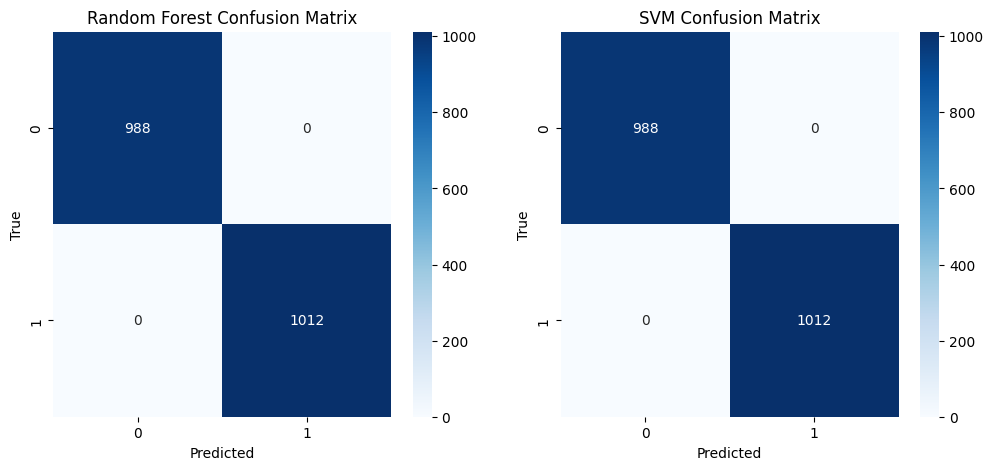

In [3]:
# Langkah 2: Load Dataset
# Upload file CSV ke Google Colab dan tentukan path-nya
from google.colab import files
uploaded = files.upload()

# Misalnya file yang diupload bernama 'Phishing_Legitimate_full.csv'
data = pd.read_csv('Phishing_Legitimate_full.csv')

# Langkah 3: Preprocessing Data
# Pisahkan fitur dan label
X = data.drop(columns=['CLASS_LABEL'])
y = data['CLASS_LABEL']

# Mengganti nilai yang tidak valid (seperti -1) dengan NaN dan kemudian mengisi nilai yang hilang
X.replace(-1, np.nan, inplace=True)
X.fillna(X.median(), inplace=True)

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Langkah 4: Membuat Model
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

# Evaluasi Model
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    return accuracy, precision, recall, f1

rf_metrics = evaluate_model(y_test, rf_pred)
svm_metrics = evaluate_model(y_test, svm_pred)

print("Random Forest Metrics:")
print(f"Accuracy: {rf_metrics[0]:.2f}")
print(f"Precision: {rf_metrics[1]:.2f}")
print(f"Recall: {rf_metrics[2]:.2f}")
print(f"F1 Score: {rf_metrics[3]:.2f}")

print("\nSVM Metrics:")
print(f"Accuracy: {svm_metrics[0]:.2f}")
print(f"Precision: {svm_metrics[1]:.2f}")
print(f"Recall: {svm_metrics[2]:.2f}")
print(f"F1 Score: {svm_metrics[3]:.2f}")

# Langkah 5: Visualisasi Hasil
# Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_pred)
svm_cm = confusion_matrix(y_test, svm_pred)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Random Forest Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('True')

sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('SVM Confusion Matrix')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('True')

plt.show()